<a href="https://colab.research.google.com/github/Sayan3sarkar/Breast_Cancer_Detection_using_Decsion_Tree_Classifier/blob/master/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3> Importing necessary libraries </h3>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h3> Load Dataset</h3>

In [0]:
from google.colab import files

In [0]:
uploaded = files.upload()

Saving breast_cancer_wisconsin.csv to breast_cancer_wisconsin.csv


In [0]:
cancer = pd.read_csv('breast_cancer_wisconsin.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

<h3> We drop 'id' and 'Unnamed :32' since these are not required</h3>

In [0]:
cancer.drop('id', axis = 1, inplace = True)

In [0]:
cancer.drop('Unnamed: 32', axis = 1, inplace = True)

In [0]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h2>Gathering information about dataset</h2>



In [0]:
cancer.shape

(569, 31)

In [0]:
cancer.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

<h3>From above cell we find that out of 569 data points, we have 357 as Benign and 212 as malignant</h3>

In [0]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

<h3>The above cell indicates we have no Null Values</h3>

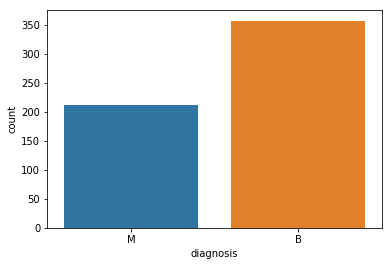

In [0]:
import seaborn as sns
sns.countplot(cancer['diagnosis'], label = 'count')

<h3>Splitting data into training and test set</h3>

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.loc[:, cancer.columns != 'diagnosis'], cancer['diagnosis'], stratify = cancer['diagnosis'], random_state = 66)

<h2> Using Decision Tree Classifier</h2>

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
tree = DecisionTreeClassifier(random_state = 0).fit(X_train, y_train)

<h2>Performance Evaluation</h2>

In [0]:
tree.score(X_train, y_train) #Acuuracy check for training set

1.0

In [0]:
tree.score(X_test, y_test)

0.9370629370629371

><h3> We can see from the above 2 cells that accuracy on training data is 100% and on test data is 93.7%</h3>
><h3>We can conclude that our model has been over-fitted and thus, gives 100% accuracy on training set</h3>

<h3>Improving the model using parameter tuning</h3>

In [0]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0).fit(X_train, y_train)

<h3>Prediction on test set</h3>

In [0]:
tree.predict(X_test)

array(['M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
      dtype=object)

<h3>Performance Evaluation</h3>

In [0]:
tree.score(X_train,y_train)#For training set

0.9859154929577465

In [0]:
tree.score(X_test, y_test)

0.9370629370629371

<h2>We overcome the problem of overfitting and obtain a 98.59% accuracy for training set and 93.7% accuracy for test set</h2>

<h2>Feature importance in trees</h2>
<h3>Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1</h3>

In [0]:
tree.feature_importances_

array([0.        , 0.02665433, 0.        , 0.02299068, 0.        ,
       0.        , 0.        , 0.01581361, 0.        , 0.        ,
       0.        , 0.        , 0.01644953, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03377907, 0.76882622, 0.        , 0.00852939,
       0.01013634, 0.        , 0.09682083, 0.        , 0.        ])

<h1>Visualization of Feature importances</h1>

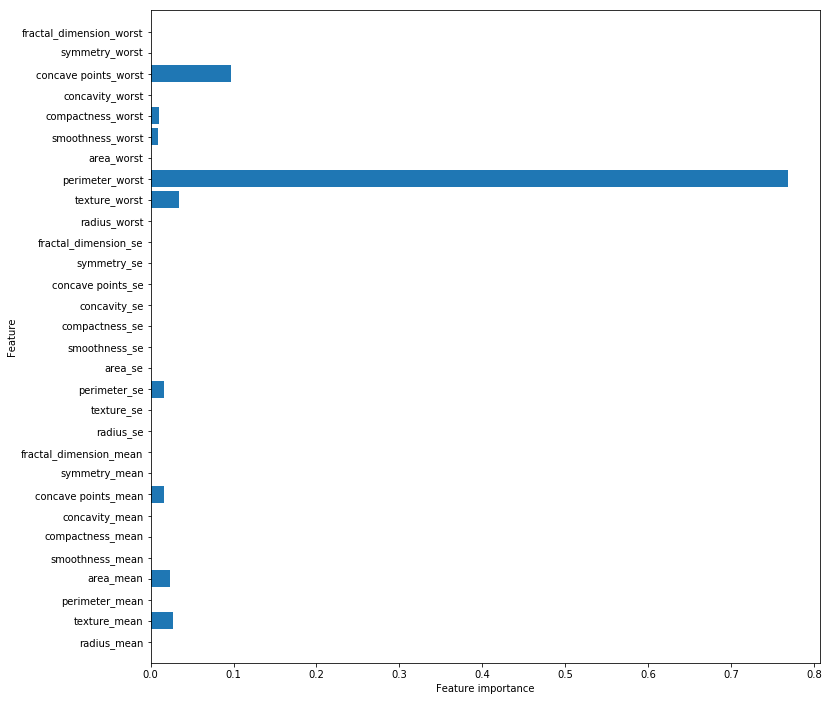

In [0]:
cancer_features = [k for i,k in enumerate(cancer.columns) if i!=0]
def plot_feature_importances(model):
    plt.figure(figsize=(12,12))
    n_features = 30
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)
plt.savefig('feature_importance')

<h2>We can conclude that <i>perimeter_worst</i> is the most important feature for determining Breast Cancer